## Whole data analysis

Need at least 32GB memory to load whole dataset

In [48]:
from datetime import date, timedelta
import gc
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt

#import lightgbm as lgb



In [5]:
train = pd.read_csv(
    'data/train.csv', usecols=[1, 2, 3, 4, 5],
    parse_dates=["date"]
)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
def check_missing(dataset):

  print('Null/Missing values\n', dataset.isnull().sum())

  # making a bool series of duplicated items
  bool_series = dataset.duplicated(keep = False)
  print('Duplicated rows:', dataset[bool_series].shape[0])

In [43]:
check_missing(train)

Null/Missing values
 date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion    21657651
dtype: int64
Duplicated rows: 0


In [45]:
# date range for whole dataset
print(train.date.min(), train.date.max())

2013-01-01 00:00:00 2017-08-15 00:00:00


In [44]:
# missing dates in whole dataset
date_range = pd.date_range(start=train.date.min(), end=train.date.max())
missing_dates = set(date_range) - set(train['date'])
print('Missing Dates are', missing_dates)

Missing Dates are {Timestamp('2015-12-25 00:00:00', freq='D'), Timestamp('2014-12-25 00:00:00', freq='D'), Timestamp('2016-12-25 00:00:00', freq='D'), Timestamp('2013-12-25 00:00:00', freq='D')}


In [36]:
# skewness of data 
train.unit_sales.kurtosis(axis = 0, skipna = True) 

1796939.3893964104

In [ ]:
# Group unit sales by date
df_temp = train.groupby([pd.Grouper(key='date', freq='D')])['unit_sales'].sum().reset_index().sort_values('date').set_index("date")

<Figure size 2160x360 with 0 Axes>

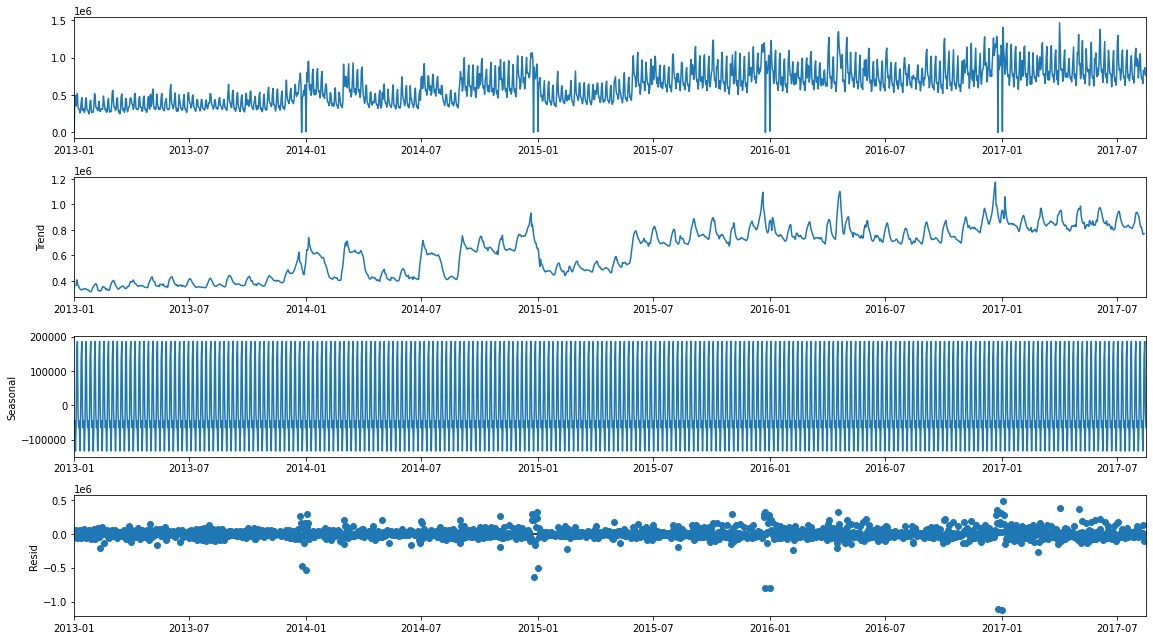

In [31]:
# seasonal pattern of the whole dataset
plt.figure(figsize=(30,5))

result = seasonal_decompose(df_temp)
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

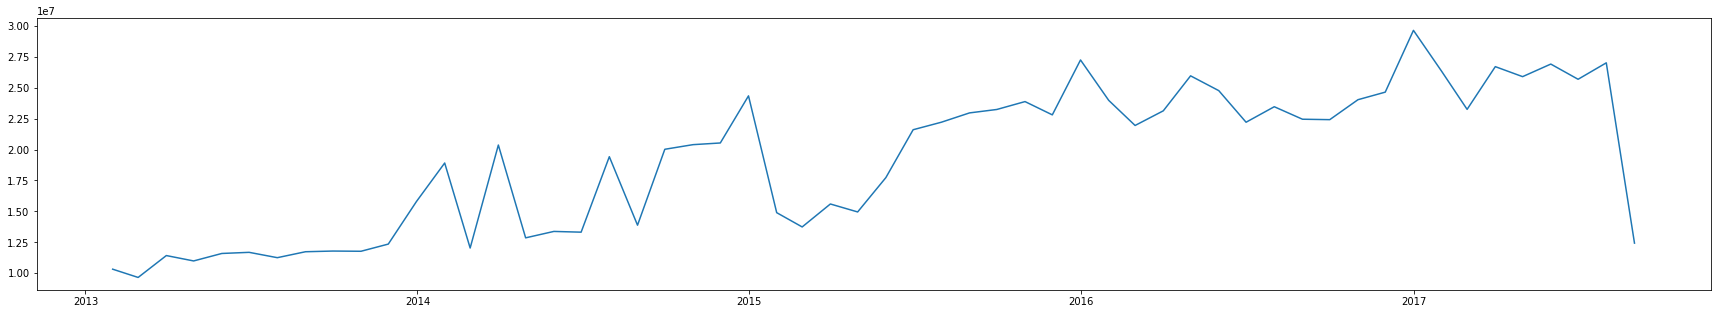

In [11]:
plt.figure(figsize=(30,5))
plt.plot(train.groupby([pd.Grouper(key='date', freq='M')])['unit_sales'].sum());


In [ ]:
# onpromotion vs mean unit sales
train.groupby("onpromotion")["unit_sales"].mean().plot.bar()